# Dropout and Batch Normalization

There are many different types of layers that can be added to the model except dense.

### Dropout

It is used to correct overfitting.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [77]:
data = pd.read_csv('data/red-wine.csv')

df_train = data.sample(frac=0.7, axis=0)
df_valid = data.drop(df_train.index)

In [78]:
max_ = df_train.max()
min_ = df_train.min()

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

X_train = df_train.drop('quality', axis=1)
y_train = df_train['quality']
X_valid = df_valid.drop('quality', axis=1)
y_valid = df_valid['quality']

In [79]:
print(f'shape of X_train: {X_train.shape}')
print(f'shape of X_valid: {X_valid.shape}')
print(f'shape of y_train: {y_train.shape}')
print(f'shape of y_valid: {y_valid.shape}')

shape of X_train: (1119, 11)
shape of X_valid: (480, 11)
shape of y_train: (1119,)
shape of y_valid: (480,)


In [80]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001, # Min change to count as improvement
    patience = 50, # how many epochs to wait before stopping
    restore_best_weights = True
)

In [81]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

/home/rownak/Documents/projects/Deep-Learning/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model.compile(
    optimizer='adam',
    loss='mae'
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=128,
    epochs=30,
    callbacks=[early_stopping]
)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2619 - val_loss: 0.1637
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1894 - val_loss: 0.1372
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1732 - val_loss: 0.1395
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1577 - val_loss: 0.1228
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1552 - val_loss: 0.1167
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1491 - val_loss: 0.1113
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1408 - val_loss: 0.1076
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1357 - val_loss: 0.1051
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1366 - val_loss: 0.1011
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1328 - val_loss: 0.1021
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1304 - val_loss: 0.1026
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1303 - val_loss: 0.1004
Epoch 13/30


<Axes: >

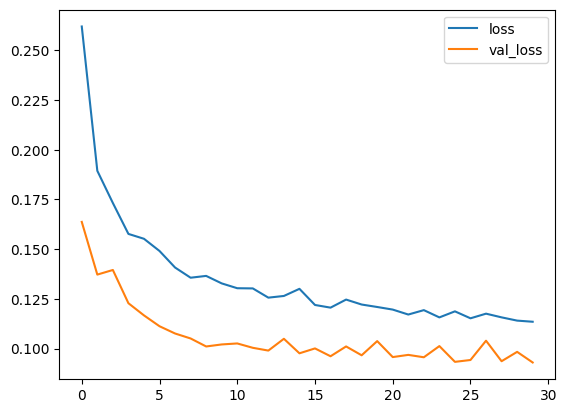

In [83]:
history_df = pd.DataFrame(history.history)

history_df.plot()

In [84]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1),
])

/home/rownak/Documents/projects/Deep-Learning/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.compile(
    optimizer='adam',
    loss='mae'
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=30,
    callbacks=[early_stopping]
)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.3313 - val_loss: 0.1877
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5347 - val_loss: 0.1413
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4201 - val_loss: 0.1376
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2865 - val_loss: 0.1347
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2654 - val_loss: 0.1338
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3063 - val_loss: 0.1279
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2417 - val_loss: 0.1275
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2276 - val_loss: 0.1225
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2064 - val_loss: 0.1262
Epoch 10/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2189 - val_loss: 0.1228
Epoch 11/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2175 - val_loss: 0.1479
Epoch 12/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2230 - val_l

<Axes: >

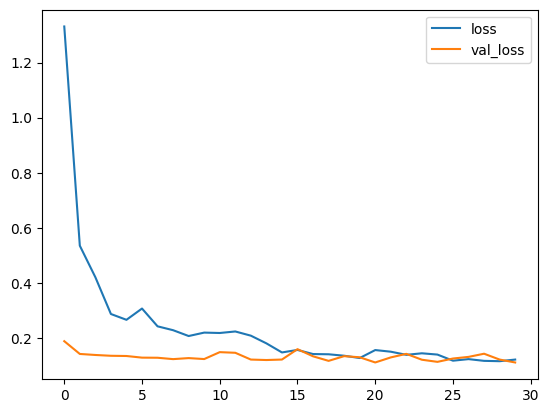

In [86]:
history_df = pd.DataFrame(history.history)

history_df.plot()